# Unsteady Bernoulli Equation

The unsteady Bernoulli equation can be written as
$$ \int_1^2\frac{\partial \mathbf{u}}{\partial t}\cdot d\mathbf{s} = \left(\frac{p}{\rho} + \frac{1}{2}|\mathbf{u}|^2 + gz\right)_1 - \left(\frac{p}{\rho} + \frac{1}{2}|\mathbf{u}|^2 + gz\right)_2.$$
* See Fluid Mechanics, by Kundu, 5th edition, page 131.) 
* This equation holds for constant viscosity, constant density, irrotational flow.
* Here, $d\mathbf{s}$ is a differential step along a streamline. 

Apply this to the following simple tank training problem connected to a long tube.

<img src='http://ignite.byu.edu/public/unsteady_bernoulli.png' width=150>

Assume the streamlines are parallel and vertical in the tank and in the pipe. This gives two uniform regions. 

The velocity in the tank and pipe is $u_t$ and $u_p$ with the two related by $u_t = \frac{A_p}{A_t}u_p$, where $A$ is area.

The unsteady term can then be integrated over each section. We assume $D_t >> D_p$ so that we can neglect $|\mathbf{u}|^2_1$. We'll take the tank as open to the atmosphere, so the pressure terms cancel since the fluid density is much greater than the air density. The result is

<font color='blue'>
$$\left(\frac{A_p}{A_t}H+h\right)\frac{du_p}{dt} = -\frac{1}{2}u_p^2 + g(H + h).$$
</font>

An unsteady mass balance on the tank gives

<font color='blue'>
$$\frac{dH}{dt} = -\frac{A_p}{A_t}u_p.$$
</font>

Often, we will neglect the unsteady term and assume a quasi-steady flow with respect to the Bernoulli equation. This gives

$$u_p = \sqrt{2g(H+h)}.$$

We'll consider two intrinsic timescales:
* A flow timescale $\tau_F$ that is the time for the tank to drain.
$$\tau_F = \frac{H_0}{u_{t,max}}.$$

<font color='blue'>
$$\tau_F = \frac{H_0}{\frac{A_p}{A_t}\sqrt{2g(H_0+h)}}.$$
</font>

* And a dynamic timescale $\tau_D$ associated with the unsteady relaxation of velocity from its initial condition of $u_p=0$,
    
$$
\tau_D = \frac{|\Delta u_p|_{max}}{\left|\frac{du_p}{dt}\right|_{max}} = \frac{\sqrt{2g(H_0+h)}}{g(H_0+h)}\left(\frac{A_p}{A_t}H_0+h\right).
$$

<font color='blue'>
$$\tau_D = \sqrt{\frac{2}{g(H_0+h)}}\left(\frac{A_p}{A_t}H_0+h\right).$$
</font>

* $\tau_D$ can be thought of as the time for a fluid particle to fall to the bottom of the pipe under the influence of gravity. If $H_0=0$, $\tau_D$ is exactly this time. The actual time to fall to the bottom of the pipe found by adding the time to fall through the tank and through the pipe separately is $\sqrt{\frac{2}{g}}(\sqrt{H_0} + \sqrt{h})$.

* The ratio of $\tau_D/\tau_F$ is 

<font color='green'>
$$\frac{\tau_D}{\tau_F} = 2\frac{A_p}{A_t}\left(\frac{A_p}{A_t} + \frac{h}{H_0}\right).$$
</font>

* When this ratio is small, the QSSA approximation is valid. This occurs for small $A_p/A_t$, and $h/H_0$ not too large in comparison to the smallness of $A_p/A_t$.

### Below, we compare the unsteady and QSSA solutions.
* For $D_t=1$, $D_p=0.1$, $h=H_0=1$ we have $\tau_D/\tau_F=0.02$ and the $H(t)$ curves are nearly the same.
* If we change $H_0$ to 0.2, $\tau_D/\tau_F=0.1$ and the $H(t)$ curves are significantly different. 

    

τDyn = 0.322
τFlow = 15.964
τDyn/τFlow = 0.020


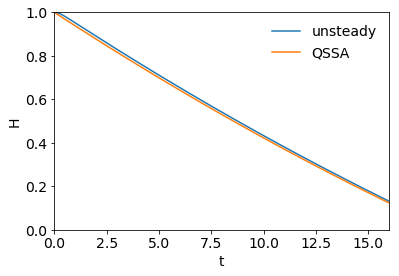

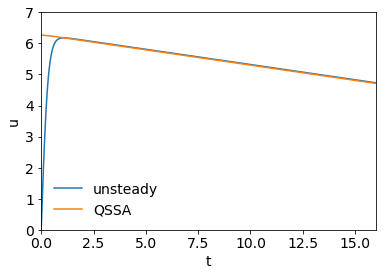

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Dt = 1.0
Dp = 0.1
h  = 1.0
H0 = 1.0
u0 = 0.0
g = 9.81

At = np.pi/4*Dt**2
Ap = np.pi/4*Dp**2

tend = H0/(Ap/At)/np.sqrt(2*g*(H0+h))

τD = np.sqrt(2/g/(H0+h))*(Ap/At*H0 + h)     # dynamic relaxation timescale for velocity (Bern. Eqn.)
τF = H0/(Ap/At)/np.sqrt(2*g*(H0+h))         # flow timescale (tank train time)

print(f'τDyn = {τD:.3f}')
print(f'τFlow = {τF:.3f}')
print(f'τDyn/τFlow = {τD/τF:.3f}')

#-------------------------------------------------

def rhsf(uH, t):
    u = uH[0]
    H = uH[1]
    
    dudt = (-1/2*u**2 + g*(h+H))/(Ap/At*H+h)
    dHdt = -Ap/At*u
    
    return np.array([dudt, dHdt])

#-------------------------------------------------

def rhsf_qssa(H, t):
    u = np.sqrt(2*g*(h+H))
    dHdt = -Ap/At*u
    
    return dHdt

#-------------------------------------------------

t = np.linspace(0, tend, 1000)

Hqssa = odeint(rhsf_qssa, H0, t)

uH = odeint(rhsf, [u0, H0], t)
u = uH[:,0]
H = uH[:,1]

#-------------------------------------------------

%matplotlib inline

plt.rc('font', size=14)

plt.plot(t,H)
plt.plot(t,Hqssa)
plt.ylim([0,H0])
plt.xlim([0,np.ceil(tend)])
plt.legend(['unsteady', 'QSSA'], frameon=False)
plt.xlabel('t')
plt.ylabel('H')

plt.figure()
plt.plot(t,u)
plt.plot(t,np.sqrt(2*g*(H+h)))
plt.xlim([0,np.ceil(tend)/1])
plt.ylim([0,np.ceil(1.1*np.max(u))])
plt.legend(['unsteady', 'QSSA'], frameon=False);
plt.xlabel('t')
plt.ylabel('u');
